STEP 1. Prepare the dataset

In [5]:
# ! pip install xlrd

In [6]:
import pandas as pd
import numpy as np

# the battery related medical device recall dataset till 2015/01/01
filename1 = "resExcelReport-battery-xxxxxxxx-20150101.csv"
# the battery related medical device recall dataset from 2015/01/01 till 2024/06/30
filename2 = "resExcelReport-battery-20150101-20240630.csv"

df1=pd.read_excel(filename1)
df2=pd.read_excel(filename2)
# # Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2], ignore_index=True)
# # Display the combined dataframe
combined_df

df_fda = combined_df

In [7]:
df_fda

,WEB_ADDRESS,RECALL_NUMBER,PRODUCT_DESCRIPTION,TRADE_NAME,RECALL_CLASS,CENTER,CENTER_CLASSIFICATION_DT,POSTED_INTERNET_DT,TERMINATION_DT,FIRM_NAME,MANUFACTURER_RECALL_REASON
0,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0485-2015,Esprit V1000 Ventilator and Esprit/V200 Conver...,Esprit V1000 Ventilator,2,CDRH,2014-11-27,2014-12-01 21:00:09,2016-06-07,Respironics California Inc,If the power supply fan mounting screws are in...
1,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0211-2015,Cardiohelp-I System\r\n\r\n Product Usage: A...,Maquet Inc.,2,CDRH,2014-11-13,2014-11-13 21:00:05,2016-04-06,"Maquet Cardiovascular Us Sales, Llc",Cardiohelp- i System may have a software issue...
2,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0146-2015,ACCU-CHEK Spirit Combo insulin infusion pump s...,Insulin infusion pump (as part of the ACCU-CHE...,2,CDRH,2014-10-28,2014-10-29 21:00:09,2018-01-10,"Roche Diagnostics Operations, Inc.",The insulin pump may lose time and date settin...
3,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0095-2015,The GemStar Power Supply is an accessory for t...,GemStar Medical Power Supply,1,CDRH,2014-10-24,2014-10-24 21:00:16,2017-03-07,Hospira Inc.,The GemStar Infusion pump may not receive dire...
4,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0096-2015,The GemStar Power Supply is an accessory for t...,GemStar Medical Power Supply,1,CDRH,2014-10-24,2014-10-24 21:00:16,2017-03-07,Hospira Inc.,The GemStar Infusion pump may not receive dire...
...,...,...,...,...,...,...,...,...,...,...,...
790,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-1526-2015,VNS Therapy DemiPulse Generator Model 103 and ...,VNS Therapy Generator,2,CDRH,2015-04-27,2015-04-27 21:01:15,2015-10-09,"Cyberonics, Inc",The pulse generators have a lower battery long...
791,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-1356-2015,Medtronic Dual Chamber Temporary External Pace...,Medtronic Model 5392 Dual-Chamber Temporary Ex...,2,CDRH,2015-03-31,2015-03-31 21:00:06,2015-10-08,Medtronic Inc. Cardiac Rhythm Disease Management,Possible performance issue when used with spec...
792,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-1307-2015,Lithium Polymer Fiber Optic Module Batteries u...,Philips Lithium Polymer Fiber Optic Module Bat...,2,CDRH,2015-03-20,2015-03-20 21:00:06,2017-01-23,"Philips Medical Systems, Inc.",VCG battery ignited in a VCG unit when recharg...
793,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-1147-2015,"The Medtronic, Quadripolar ITREL 3 IPG, Model ...",Itrel 3 IPG; InterStim II INS: InterStim INS ;...,2,CDRH,2015-02-24,2015-06-26 22:53:50,2017-09-28,Medtronic Neuromodulation,Current labeling indicates that cycling improv...


# Extract extra information from FDA website

Since the dataframe missing the column of "FDA Determined cause", we need that for categorization

# An example

In [20]:
eg1 = df_fda['WEB_ADDRESS'][4411]
eg1

'http://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfres/res.cfm?id=162618'

In [28]:
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from bs4 import BeautifulSoup

eg1 = df_fda['WEB_ADDRESS'][4411]
eg1

# Disable SSL verification
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
# URL of the website
url = eg1
# Make the request
response = requests.get(url, verify=False)


# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

fda_determined_cause_row = soup.find('a', attrs={'href': "#2"})

if fda_determined_cause_row is not None:
    cause_parent = fda_determined_cause_row.parent
    if cause_parent is not None:
        cause = cause_parent.find_next_sibling('td').text.strip()
    else:
        cause = 'no fda determined cause in web'
else:
    cause = 'no fda determined cause in web'

# Print the extracted cause information
print(cause)

no fda determined cause in web


In [29]:
eg1

'http://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfres/res.cfm?id=162618'

In [19]:
cause_parent

<tr>
<th align="left" nowrap="" valign="top">FDA Determined<br/>Cause <a href="#2"><sup>2</sup></a></th>
<td align="left" valign="top">Under Investigation by firm</td>
</tr>

In [8]:
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from bs4 import BeautifulSoup

def find_fda_det_cause(url):
    # Disable SSL verification
    requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
    # URL of the website
    # Make the request
    response = requests.get(url, verify=False)

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    fda_determined_cause_row = soup.find('a',attrs={'href':"#2"})

    if fda_determined_cause_row is not None:
        cause_parent = fda_determined_cause_row.parent
        if cause_parent is not None:
            cause = cause_parent.find_next_sibling('td').text.strip()
        else:
            cause = 'no fda determined cause in web'
    else:
        cause = 'no fda determined cause in web'
    
    print(cause)
    
    return cause

# Do not run if you have done this already !!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
import time
cause = []
for i in range(0,len(df_fda)):
    print('Now processing #',i)
    url = df_fda['WEB_ADDRESS'][i]
    cause.append(find_fda_det_cause(url))
    print('#',i,' finished')
    if i%1000 ==0:
        time.sleep(30)

Now processing # 0
Device Design
# 0  finished
Now processing # 1
Software Design Change
# 1  finished
Now processing # 2
Equipment maintenance
# 2  finished
Now processing # 3
Process control
# 3  finished
Now processing # 4
Process control
# 4  finished
Now processing # 5
Unknown/Undetermined by firm
# 5  finished
Now processing # 6
Device Design
# 6  finished
Now processing # 7
Device Design
# 7  finished
Now processing # 8
Component design/selection
# 8  finished
Now processing # 9
Component design/selection
# 9  finished
Now processing # 10
Component design/selection
# 10  finished
Now processing # 11
Device Design
# 11  finished
Now processing # 12
Manufacturing material removal
# 12  finished
Now processing # 13
Component design/selection
# 13  finished
Now processing # 14
Software Manufacturing/Software Deployment
# 14  finished
Now processing # 15
Unknown/Undetermined by firm
# 15  finished
Now processing # 16
Under Investigation by firm
# 16  finished
Now processing # 17
Devi

Nonconforming Material/Component
Package design/selection
Component change control
Employee error
Equipment maintenance
Unknown/Undetermined by firm
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Unknown/Undetermined by firm
Device Design
Device Design
Nonconforming Material/Component
Device Design
Under Investigation by firm
Under Investigation by firm
Process control
Under Investigation by firm
Process control
Device Design
Device Design
Nonconforming Material/Component
Under Investigation by firm
Mixed-up of materials/components
Nonconforming Material/Component
Use error
Device Design
Device Design
Reprocessing Controls
Other
Nonconforming Material/Component
Under Investigation by firm
Labeling mix-ups
Mixed-up of materials/components
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Software Manufacturing/Software Deployment
Process control
Device Design
Nonconforming Material/Component
Nonco

Nonconforming Material/Component
Nonconforming Material/Component
Process design
Process design
Equipment maintenance
Equipment maintenance
Equipment maintenance
Process design
Device Design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Equipment maintenance
Equipment maintenance
Device Design
Component design/selection
Process design
Process design
Equipment maintenance
Equipment maintenance
Equipment maintenance
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Equipment maintenance
Process design
Software design
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Compon

Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Other
Incorrect or no expiration date
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Other
Equipment maintenance
Equipment maintenance
Process control
Other
Other
Other
Other
Other
Other
Other
Equipment maintenance
Equipment maintenance
Other
Other
Other
Other
Software design
Equipment maintenance
Other
Other
Other
Other
Other
Other
Other
Other
Other
O

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Equipment maintenance
Equipment maintenance
Equipment maintenance
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Under Investigation by firm
Under Investigation by firm
Software design
Software design
Under Investigation by firm
Package design/selection
Software design
Package design/selection
Software design
Under Investigation by firm
Under Investigation by firm
Unknown/Undetermined by firm
Labeling mix-ups
Material/Component Contamination
Under Investigation by firm
Software design
Material/Component Contamination
Software design
Device Design
Device Design
Under Investigation by firm
Software design
Component change control
Component change control
Component change control
Component change control
Component change control
Component change control
Component change control
Component change control
Packaging
Labeling design
Component change control
Compo

Packaging process control
Device Design
Component design/selection
Under Investigation by firm
Software design
Under Investigation by firm
Device Design
Labeling False and Misleading
Process control
Packaging process control
Component design/selection
Under Investigation by firm
Labeling False and Misleading
Labeling False and Misleading
Under Investigation by firm
Other
Other
Other
Nonconforming Material/Component
Process control
Other
Under Investigation by firm
Process design
Software design
Unknown/Undetermined by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Unknown/Undetermined by firm
Labeling False and Misleading
Under Investigation by firm
Under Investigation by firm
Employee error
Under Investigation by firm
Under Investigation by firm
Storage
Unknown/Undetermined by firm
Under Investigation by firm
Under Investigation by firm
Process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under In

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconform

Under Investigation by firm
Software design
Under Investigation by firm
Labeling mix-ups
Labeling False and Misleading
Nonconforming Material/Component
Labeling False and Misleading
Labeling False and Misleading
Employee error
Device Design
Labeling False and Misleading
Device Design
Labeling False and Misleading
Software change control
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Nonconforming Material/Component
Software design
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Other
Nonconforming Material/Component
Employee error
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Mater

Device Design
Device Design
Device Design
Device Design
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Device Design
Device Design
Device Design
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Device Design
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation 

Use error
Software Manufacturing/Software Deployment
Component design/selection
Labeling mix-ups
Device Design
Process control
Process control
Employee error
Labeling Change Control
Software design
Device Design
Labeling Change Control
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Process control
Under Investigation by firm
Radiation Control for Health and Safety Act
Under Investigation by firm
Labeling design
Radiation Control for Health and Safety Act
Labeling Change Control
Under Investigation by firm
Radiation Control for Health and Safety Act
Incorrect or no expiration date
Device Design
Radiation Control for Health and Safety Act
Under Investigation by firm
Radiation Control for Health and Safety Act
Device Design
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Device Design
Under Investigation by fi

Device Design
Labeling Change Control
Nonconforming Material/Component
Device Design
Process control
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Software change control
Packaging
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Component change control
Material/Component Contamination
Packaging process control
No Marketing Application
Incorrect or no expiration date
Employee error
Nonconforming Material/Component
Software design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Labeling False and Misleading
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design


Device Design
Device Design
Device Design
Use error
Process control
Unknown/Undetermined by firm
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
No Marketing Application
No Marketing Application
No Marketing Application
No Marketing Application
Under Investigation by firm
Component design/selection
Software design
Component design/selection
Packaging process control
Nonconforming Material/Component
Labeling design
Labeling Change Control
Nonconforming Material/Component
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Labeling Change Control
Under Investigation by firm
No Marketing Application
Other
No Marketing Application
Device Design
Device Design
Device Design
Device Design
Component change control
Device Design
Device Design
Component change control
De

Device Design
Device Design
Component change control
Device Design
Other
Device Design
Process control
Component design/selection
Material/Component Contamination
Material/Component Contamination
Nonconforming Material/Component
Process control
Material/Component Contamination
Process control
Software change control
Device Design
Pending
Process control
Pending
Pending
Process control
Pending
Device Design
Device Design
Radiation Control for Health and Safety Act
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Mixed-up of materials/components
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Mixed-up of materials/components
Device Design
Software design
Error in labeling
Error in labeling
Device Design
Employee error
Device Design
No Marketing Application
Nonconforming Material/Component
Nonconforming Material/Component


Under Investigation by firm
Process control
Labeling design
Labeling design
Labeling design
Packaging
Nonconforming Material/Component
Labeling design
Labeling design
Software design
Labeling design
Labeling design
Labeling design
Labeling design
Labeling design
Labeling design
Labeling design
Under Investigation by firm
Labeling design
Software design
Radiation Control for Health and Safety Act
Software design
Device Design
Manufacturing material removal
Manufacturing material removal
Device Design
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Packaging process control
Manufacturing material removal
Manufacturing material removal
Manufacturing material removal
Labe

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Error in labeling
Error in labeling
Other
Other
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconfo

Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Employee error
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Software design
Under Investigation by firm
Under Investigation by firm
Environmental control
Environmental control
Device Design
Device Design
Employee error
Environmental control
Environmental control
Device Design
Environmental control
Environmental control
Environmental control
Environmental control
Environmental control
Error in labeling
Component design/selection
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Component design/selection
Component design/selection
Error in labeling
Process design
Mi

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconform

Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Labeling mix-ups
Labeling Change Control
Under Investigation by firm
Device Design
No Marketing Application
Other
Other
Nonconforming Material/Component
Under Investigation by firm
Process control
Process control
Process control
Under Investigation by firm
Process control
Under Investigation by firm
Process control
Process control
Process control
Process control
Process control
Process control
Nonconforming Material/Component
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Under Investigation by firm
Process control
Process control
Employee error
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Radiation Control f

Pending
Nonconforming Material/Component
Device Design
Material/Component Contamination
Process control
Process control
Process control
Process control
Mixed-up of materials/components
Pending
Process control
Process control
Process control
Device Design
Software design
Device Design
Material/Component Contamination
Employee error
Device Design
Process design
Device Design
Device Design
Employee error
Pending
Device Design
Device Design
Device Design
Labeling design
Device Design
Device Design
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Process control
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Component design/selection
Packaging
Software design
Process control
Software design
Software design
Software design
Device Design
Process control
Vendo

Other
Other
Other
Other
Other
Other
Other
Nonconforming Material/Component
Other
Other
Other
Other
Software design
Other
Software design
Error in labeling
Device Design
Other
Nonconforming Material/Component
Device Design
Employee error
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Other
Process control
Other
Other
Other
Other
PMA
Other
Other
Other
Other
Other
Other
Process control
Process control
Other
Other
Other
Other
Nonconforming Material/Component
Other
Other
Process control
Other
Error in labeling
Other
Other
Other
Other
Other
Release of Material/Component prior to receiving test results
Other
Labeling mix-ups
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Software design
Package design/selection
Other
Component design/selection
Component desig

Software design
Software design
Error in labeling
Software design
Process control
Process control
Software design
Software design
Software design
Error in labeling
Software design
Error in labeling
Software design
Software design
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Employee error
Other
Other
Finished device change control
Other
Other
Other
Other
Other
Employee error
Other
Other
Other
Other
Other
Vendor change control
Vendor change control
Software design
Vendor change control
Vendor change control
Vendor change control
Package design/selection
Vendor change control
Vendor change control
Device Design
Device Design
Component design/selection
Device Design
Device Design
Device Design
Component design/selection
Device Design
Labeling design
Material/Component Contamination
Packaging process control
Packaging process control
Nonconforming Material/Component
Software change control
Nonconforming Material/Component
Packaging process control
Non

Process control
Under Investigation by firm
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Under Investigation by firm
Incorrect or no expiration date
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Software design
Process design
Process design
Component design/selection
Component design/selection
Packaging change control
Process control
Process control
Component design/selection
Packaging change control
Software design
Software design
Software design
Software design
Process control
Software design
Software design
Software design
Software design
Software design
Under Investigation by firm
Software design
Software design
Device Design
Software design
Software design
Software design
Software design
Process control
Device Design
Process control
Device Design
Device Design
Device Design
Process control
Devic

Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Process control
Other
Under Investigation by firm
Under Investigation by firm
Device Design
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Component change control
Labeling Change Control
Device Design
Software design
Labeling Change Control
Under Investigation by firm
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by fir

Other
Software design
Software design
Device Design
Employee error
Software design
Other
Nonconforming Material/Component
Device Design
Software design
Other
Other
Other
Other
Other
Other
Process control
Device Design
Device Design
Device Design
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Process control
Employee error
Process control
Component design/selection
Software design
Software design
Incorrect or no expiration date
Software design
Packaging
Device Design
Under Investigation by firm
Software design
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Device Design
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Software design
Under Investigation by firm
Under Investigation by firm
U

Process control
Nonconforming Material/Component
Nonconforming Material/Component
Process control
Process control
Device Design
Under Investigation by firm
Process control
Software change control
Under Investigation by firm
Software design
Device Design
Nonconforming Material/Component
Labeling design
Under Investigation by firm
Labeling Change Control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Labeling Change Control
Under

Under Investigation by firm
Device Design
Incorrect or no expiration date
Labeling Change Control
Other
Software in the Use Environment
Software in the Use Environment
Material/Component Contamination
Software design
Nonconforming Material/Component
Component design/selection
No Marketing Application
Employee error
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
No Marketing Application
Component design/selection
Labeling design
Under Investigation by firm
Under Investigation by firm
Radiation Control for Health and Safety Act
Labeling design
Other
Labeling design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Pro

Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Employee error
Under Investigation by firm
Device Design
Labeling design
Mixed-up of materials/components
Software design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Process control
Process control
Process change control
Process change control
Packaging process control
Packaging process control
Process change control
Process change control
Process change control
Under Investigation by firm
Equipment maintenance
Under Investigation by firm
Process change control
Process change control
Process change control
Proce

Mixed-up of materials/components
Labeling design
Unknown/Undetermined by firm
Software design
Device Design
Device Design
Unknown/Undetermined by firm
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Mat

Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Under Investigation by firm
Environmental control
Package design/selection
Under Investigation by firm
Software design
Under Investigation by firm
Material/Component Contamination
Nonconforming Material/Component
Employee error
Material/Component Contamination
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Packaging
Packaging
Nonconforming Material/Component
Error in labeling
Error in labeling
Nonconforming Material/Component
Process control
No Marketing Application
Device Design
Nonconforming Material/Component
Equipment maintenance
Nonconforming Material/Component
Softwa

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Other
Other
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Componen

Device Design
Component design/selection
Process design
Software design
Software design
Other
Packaging process control
Packaging process control
Software design
Component design/selection
Process control
Process control
Software change control
Environmental control
Process control
Process control
Process control
Process control
Process control
Device Design
Process control
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Packaging process control
Nonconforming Material/Component
Process design
Device Design
Under Investigation by firm
Under Investigation by firm
Process design
Storage
No Marketing Application
Other
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
No Marketing Application
Nonconforming Material/Component
Process control
Packaging
Nonconforming Material/Component
Software design
Employee error
Process control
Labeling design
Nonconforming Material/C

Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Software design
Device Design
Under Investigation by firm
Software design
Software design
Component design/selection
Component design/selection
Component design/selection
Nonconforming Material/Component
Process control
Other
Labeling mix-ups
Software design
Nonconforming Material/Component
Device Design
Labeling mix-ups
Device Design
Device Design
Device Design
Device Design
Software in the Use Environment
Under Investigation by firm
Labeling mix-ups
Device Design
Device Design
Device Design
Device Design
Device Design
Labeling mix

Component design/selection
Device Design
Device Design
Device Design
Device Design
Error in labeling
Radiation Control for Health and Safety Act
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Equipment maintenance
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Labeling Change Control
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Software design
Under Investigation by firm
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Error in 

Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design

Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Process control
Device Design
Process change control
Process change control
Unknown/Undetermined by firm
Process control
Device Design
Process control
Process control
Mixed-up of materials/components
Process control
Software in the Use Environment
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Nonconforming Material/Component
Nonconforming Material/Component
Error in labeling
Error 

Under Investigation by firm
Under Investigation by firm
Packaging
Pending
Device Design
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Labeling Change Control
Process control
Process control
No Marketing Application
Software design
Environmental control
Environmental control
Environmental control
Environmental control
Environmental control
Environmental control
Process control
Environmental control
Environmental control
Environmental control
Environmental control
Under Investigation by firm
Process design
Process design
Process design
Process design
Process design
Employee error
Process design
Employee error
Process design
Process design
Process design
Employee error
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process control
Process control
Labeling mix-ups
Equipment maintenance
Process control
Process control
Process control
Process control
Process control
Process control
Proce

Vendor change control
Vendor change control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Vendor change control
Packaging process control
Packaging process control
Packaging process control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Vendor change control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Packaging process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
No Marketing Application
Employee error
Other
Process control


Packaging
Process control
Under Investigation by firm
Device Design
Device Design
Packaging process control
Radiation Control for Health and Safety Act
Labeling mix-ups
Nonconforming Material/Component
Unknown/Undetermined by firm
Error in labeling
Nonconforming Material/Component
Labeling mix-ups
Other
Other
Device Design
Device Design
Device Design
Device Design
Process control
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Process design
Error in labeling
Process design
Process design
Process design
Material/Component Contamination
Process design
Nonconforming Material/Component
Process design
Process design
Process design
Labeling False and Misleading
Labeling False and Misleading
Other
Under Investigation by firm
Labeling False and Misleading
Labeling False and Mislea

Device Design
Labeling design
Device Design
Under Investigation by firm
Labeling design
Labeling design
Under Investigation by firm
Under Investigation by firm
Labeling design
Under Investigation by firm
Employee error
Under Investigation by firm
Storage
Nonconforming Material/Component
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Storage
Device Design
Nonconforming Material/Component
Process control
Software design
Software design
Process change control
Software Design Change
Error in labeling
Process control
Employee error
Device Design
Device Design
Device Design
Device Design
No Marketing Application
No Marketing Application
Device Design
Device Design
No Marketing Application
Device Design
No Marketing Application
No Marketing Application
Process control
Component design/selection
Component design/selection
Under Investigation by firm
Under Investigation by firm
Softw

Process control
Process control
Other
Process control
Device Design
Device Design
Storage
Storage
Storage
Process control
Process control
Employee error
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Process control
Nonconforming Material/Component
Labeling design
Labeling design
Nonconforming Material/Component
Process control
Process control
Device Design
Component design/selection
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Employee error
Radiation Control for Health and Safety Act
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Storage
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Device Design
Process control
Under Investigation by firm
Under Investigation by firm
Software design
Process control
Process control
Other
Other
Device Design
Device Design
Process control
Other
Software in the Use Environment
Under

Labeling False and Misleading
Packaging
Labeling False and Misleading
Device Design
Process control
Process change control
Component design/selection
Component design/selection
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Device Design
Labeling False and Misleading
Labeling False and Misleading
Component change control
Nonconforming Material/Component
Device Design
Unknown/Undetermined by firm
Software design
Process design
Software design
Process design
Software design
Process design
Device Design
Device Design
Process control
Process control
Process control
Nonconforming Material/Component
Process control
Packaging process control
Employee error
Packaging process control
Process control
Process control
Labeling Change Control
Labeling mix-ups
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Device Design
Software design (manufacturing process)
Software design
Under Investigation by firm
Software

Software design
Equipment maintenance
Device Design
Nonconforming Material/Component
Device Design
Device Design
Software design
Labeling design
Labeling design
Process control
Incorrect or no expiration date
Other
Employee error
Unknown/Undetermined by firm
Nonconforming Material/Component
Use error
Other
Process control
Other
Pending
Device Design
Packaging process control
Labeling mix-ups
Labeling mix-ups
Finished device change control
Use error
Process control
Labeling False and Misleading
Under Investigation by firm
Environmental control
Component design/selection
Device Design
Nonconforming Material/Component
Labeling design
Labeling Change Control
Process control
Labeling design
Software design
Labeling mix-ups
Process control
Under Investigation by firm
Component change control
Device Design
Material/Component Contamination
Device Design
Process design
Process control
Process control
Employee error
Device Design
Software design
Device Design
Other
Employee error
Nonconforming M

Packaging
Packaging
Packaging
Packaging
Packaging
Packaging
Nonconforming Material/Component
Packaging
Packaging
Packaging
Packaging
Packaging
Employee error
Under Investigation by firm
Under Investigation by firm
Material/Component Contamination
Under Investigation by firm
Process control
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Component design/selection
Process control
Device Design
Labeling Change Control
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Software Manufacturing/Software Deployment
Component design/selection
Labeling Change Control
Under Investigation by firm
Software design
Software design
Packaging process control
Device Design
Device Design
Process design
No Marketing Application
Nonconforming Material/Component
Process design
Software design
Process design
Equipment maintenance
Nonconforming Material/Component
Process design
Process design
P

Device Design
Device Design
Under Investigation by firm
Process change control
Nonconforming Material/Component
Nonconforming Material/Component
Storage
Device Design
Software design
Radiation Control for Health and Safety Act
Employee error
Software design
Other
Storage
Software design
Device Design
Process control
Process control
Nonconforming Material/Component
Device Design
Labeling False and Misleading
Release of Material/Component prior to receiving test results
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Unknown/Undetermined by firm
Use error
Process design
Process design
Process design
Process design
Mixed-up of materials/components
Process design
Nonconforming Material/Component
Process control
Under Investigation by firm
Software design
Process design
Device Design
Software design
Device Design
Device Design
Incorrect or no expiration date
Process control
Software Design Change
Process design
No Marketing Application
Proc

No Marketing Application
Under Investigation by firm
Under Investigation by firm
Process design
Process control
Process control
Nonconforming Material/Component
Labeling Change Control
Process control
Under Investigation by firm
Software design
Device Design
Packaging process control
Packaging process control
Packaging process control
Device Design
Component change control
Device Design
Other
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Nonconforming Material/Component
Component change control
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Component change control
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Device Design
Device Design
Device Design
Packaging process control
Device Design
Device Design
Labeling design
Device Design
Devic

NameError: name 'df' is not defined

In [5]:
df=pd.DataFrame({
    'num':range(0,len(cause)),
    'cause':cause
})

df.to_csv(f'cause data_{len(cause)}.csv')

In [32]:
cause = []
for i in range(19149,len(df_fda)):
    url = df_fda['WEB_ADDRESS'][i]
    cause.append(find_fda_det_cause(url))
    
df_fda['FDA Determined Cause'] = cause

no fda determined cause in web
Device Design
Under Investigation by firm
Software design
Device Design
Device Design
Use error
Device Design
Device Design
Software design
Under Investigation by firm
Other
Device Design
Device Design
Nonconforming Material/Component
Mixed-up of materials/components
Other
Device Design
Error in labeling
Environmental control
Environmental control
Labeling False and Misleading
Environmental control
Environmental control
Device Design
Device Design
Process design
Environmental control
Environmental control
Environmental control
Other
Component design/selection
Labeling False and Misleading
Device Design
Environmental control
Other
Environmental control
Software Manufacturing/Software Deployment
Environmental control
Environmental control
Other
Labeling False and Misleading
Device Design
Environmental control
Device Design
Device Design
Environmental control
Other
Under Investigation by firm
Device Design
Under Investigation by firm
Labeling design
Under In

Other
Under Investigation by firm
Under Investigation by firm
Process control
Device Design
Process control
Under Investigation by firm
Nonconforming Material/Component
Process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Under Investigation by firm
Material/Component Contamination
Employee error
Device Design
Other
Under Investigation by firm
Software Design Change
Package design/selection
Software Design Change
Nonconforming Material/Component
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Employee error
Process control
Device Design
Device Design
Device Design
Under Investigation by firm
Mixed-up of materials/components
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Material/Component Contamination
Device Design
Unknown/Undetermined by firm
Device Design
Packaging process control
Device Design
Device Design
Pro

Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Equipment maintenance
Equipment maintenance
Process control
Process control
Process control
Process control
Process control
Process control
Packaging process control
Process control
Process control
Nonconforming Material/Component
Process control
Equipment maintenance
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Equipment maintenance
Packaging process control
Process control
Equipment maintenance
Equipment maintenance
Packaging process control
Process control
Process control
Process control
Nonconforming Material/Component
Process control
Process control
Nonconforming Material/Component
Process control
Process control
Process control
Process control
Software design
Software design
Device Design
Device Design
Error in labeling
Error in labeling
Error in labeling
Error in labeling

Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Labeling Change Control
Labeling Change Control
Component change control
Component change control
Under Investigation by firm
Component change control
Component change control
Component change control
Radiation Control for Health and Safety Act
Labeling Change Control
Component change control
Process design
Error in labeling
Device Design
Radiation Control for Health and Safety Act
Software design
Employee error
Software design
Software design
Other
Other
Employee error
Software design
Software design
Other
Process control
Software design
Other
Other
Other
Employee error
Software design
Employee error
Software design
Employee error
Software design
Other
Other
Employee error
Employee error
Software design
Other
Other
Other
Employee error
Employee error
Under Investigatio

Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation 

Process control
Other
Packaging
Employee error
Process control
Labeling False and Misleading
Labeling False and Misleading
Process control
Other
Process control
Process control
Process control
Component change control
Component change control
Component change control
Other
Nonconforming Material/Component
Component change control
Component change control
Process control
Component change control
Labeling mix-ups
Other
Process control
Device Design
Device Design
Package design/selection
Package design/selection
Package design/selection
Radiation Control for Health and Safety Act
Package design/selection
Other
Other
Radiation Control for Health and Safety Act
Employee error
Other
Component design/selection
Radiation Control for Health and Safety Act
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software Design Change
Device Design
Software design
Software design
Software 

Device Design
Device Design
Labeling False and Misleading
Under Investigation by firm
Nonconforming Material/Component
Software design (manufacturing process)
Process control
Process control
Labeling False and Misleading
Process control
Process control
Labeling False and Misleading
Unknown/Undetermined by firm
Labeling design
Device Design
Nonconforming Material/Component
Device Design
Material/Component Contamination
Process control
Process control
Packaging process control
Process control
Material/Component Contamination
Other
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Package design/selection
Packaging process control
Process control
Nonconforming Material/Component
Process control
Nonconforming Material/Component
Labeling False and Misleading
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Software design
Nonconforming Material/Component
Package design/selection
Component design/selection
Devi

Use error
Use error
Under Investigation by firm
Use error
Use error
Use error
Use error
Labeling Change Control
Under Investigation by firm
Other
Under Investigation by firm
Process control
Device Design
Under Investigation by firm
Device Design
Under Investigation by firm
Other
Other
Device Design
Under Investigation by firm
Other
Other
Employee error
Packaging
Device Design
Software design
Software design
Device Design
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Process change control
Nonconforming Material/Component
Error in labeling
Nonconforming Material/Component
Nonconforming Material/Component
Process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Device Design
Process control
Device Design
Device Design
Software design
Device Design
Device Design
Device Design
Process control
Component change control
Nonconforming Material/Component
Software design
Under Investigation b

Package design/selection
Package design/selection
Software design
Device Design
Device Design
Device Design
Device Design
Employee error
Device Design
Software design
Software design
Use error
Use error
Package design/selection
Package design/selection
Package design/selection
Use error
Package design/selection
Package design/selection
Package design/selection
Use error
Use error
Software design
Package design/selection
Package design/selection
Use error
Mixed-up of materials/components
Package design/selection
Package design/selection
Software change control
Package design/selection
Package design/selection
Process control
Package design/selection
Use error
Use error
Use error
Package design/selection
Component design/selection
Process control
Labeling mix-ups
Component design/selection
Under Investigation by firm
Process design
Employee error
Device Design
Device Design
Process control
Labeling design
Employee error
Labeling mix-ups
Unknown/Undetermined by firm
Device Design
Device D

Equipment maintenance
Equipment maintenance
Device Design
Nonconforming Material/Component
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Labeling False and Misleading
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Component design/selection
Component design/selection
Other
Software design
Nonconforming Material/Component
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Storage
Storage
Under Investigation by firm
Device Design
Storage
Storage
Storage
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Component design/selection
Under Investi

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Software design
Nonconforming Material/Component
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Device Design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Packaging change control
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Device Design
Device Design
Device Design
Process design
Nonconforming Material/Component
Software design
Device Design
Software design
Under Investigation by firm
Process control
Device Design
Under Investigation by firm
Process design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/C

Device Design
Other
Software design
Other
Labeling mix-ups
Other
Device Design
Nonconforming Material/Component
Other
Other
Device Design
Device Design
Other
Other
Other
Software design
Process control
Process change control
Device Design
Labeling False and Misleading
Labeling design
Labeling design
Other
Device Design
Other
Other
Other
Device Design
Device Design
Process control
Device Design
Package design/selection
Software design
Device Design
Labeling design
Other
Process control
Radiation Control for Health and Safety Act
Other
Device Design
Software design
Pending
Device Design
Pending
Other
Device Design
Nonconforming Material/Component
Device Design
Other
Radiation Control for Health and Safety Act
Other
Other
Pending
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
Component design/selection
Labeling mix-ups
Component design/selection
Pending
Device Design
Other
Other
Other
Other
Other
Other
Other
Other
Other
Ot

Process control
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Labeling mix-ups
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Process control
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Material/Component Contamination
Process control
Nonconforming Material/Component
Labeling mix-ups
Other
Process control
Nonconforming Material/Component
Labeling Change Control
Other
Labeling design
Component design/selection
Error in labeling
Device Design
Component design/selection
Software design
Under Investigation by firm
Software design
Software design
Nonconforming Material/Component
Software design
Component design/selection
Vendor change control
Device Design
Process control
Process control
Component design/selection
Software design
Under Investigation by firm
Component design/selection
Process control
D

Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Software design
Nonconforming Material/Component
Software design
Software design
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Other
Material/Component Contamination
Mixed-up of materials/components
Component design/selection
Component design/selection
Employee error
Device Design
Under Investigation by firm
Device Design
Device Design
Process design
Software design
Under Investigation by firm
Software design
Storage
Device Design
Under Investigation by firm
Nonconforming Material/Component
Process control
Process change control
Under Investigation by firm
Process change control
No Marketing Application
Employee error
Process control
Labeling Change Control
Process control
Process control
Labeling Change Control
Under Investigation b

Device Design
Other
Device Design
Process change control
Component change control
Component design/selection
Software design
Material/Component Contamination
Component design/selection
Process control
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Reprocessing Controls
Software design
Device Design
Packaging process control
Radiation Control for Health and Safety Act
Component design/selection
Component design/selection
Nonconforming Material/Component
Radiation Control for Health and Safety Act
Device Design
Device Design
Nonconforming Material/Component
Unknown/Undetermined by firm
Material/Component Contamination
Equipment maintenance
Equipment maintenance
Equipment maintenance
Packaging
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Error in labeling
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment mainte

Device Design
Device Design
Process control
Process control
Under Investigation by firm
Process control
Device Design
Software design
Software design
Software design
Device Design
Software design
Device Design
Software design
Labeling Change Control
Under Investigation by firm
Material/Component Contamination
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Component design/selection
Package design/selection
Under Investigation by firm
Device Design
Component design/selection
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Process control
Nonconforming Material/Component
Other
Process control
Under Investigation by firm
Under Investigation by firm
Process control
Nonconforming Material/Component
Nonconforming Material/Component

Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Unknown/Undetermined by firm
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Process control
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Process control
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
D

Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Device Design
Device Design
Device Design
Device Design
Packaging
Packaging
Under Investigation by firm
Material/Component Contamination
Packaging
Packaging
Packaging
Packaging
Employee error
Employee error
Device Design
Packaging
Packaging
Packaging
Device Design
Device Design
Device Design
Device Design
Packaging
Packaging
Employee error
Packaging
Device Design
Packaging
Employee error
Device Design
Device Design
Device Design
Device Design
Packaging
Process control
Packaging
Device Design
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Other
Nonconforming Material/Component
Other
Process control
Process control
Process control
Nonconforming Material/Component
Process control
Process control
Software design
Process control
Labeling False and Misleading
Lab

Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Device Design
Device Design
Under Investigation by firm
Device Design
Packaging process control
Device Design
Device Design
Vendor change control
Process control
Vendor change control
Vendor change control
Device Design
Vendor change control
Process control
Process control
Process control
Vendor change control
Vendor change control
Vendor change control
Process control
Process control
Process control
Vendor change control
Process control
Process control
Vendor change control
Device Design
Process control
Process control
Process control
Vendor change control
Vendor change control
Vendor change control
Process control
Process control
Labeling design
Process control
Process control
Process control
Device Design
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Process control
Nonconforming Material/Component
Software design
Process

Packaging change control
Component design/selection
Packaging change control
Packaging process control
Process control
Labeling Change Control
Process control
Process control
Under Investigation by firm
Process control
Process control
Process control
Under Investigation by firm
Process control
Process control
Process control
Process control
Software design
Process control
Software change control
Process control
Labeling design
Process control
Process control
Process control
Process control
Process control
Labeling Change Control
Process control
Process control
Software change control
Software change control
Process control
Process control
Process control
Process control
Labeling Change Control
Device Design
Device Design
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Process control
Under Investigation by firm
Under Investigation by firm
Process control
Process control
Process control
Under

Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Process design
Process design
Process design
Employee error
Nonconforming Material/Component
Employee error
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Process design
Process design
Process design
Nonconforming Material/Component
Process design
Software change control
Process design
Process design
Process design
Process design
Process design
Process design
Software change control
Device Design
Equipment maintenance
Device Design
Process control
Process control
Process control
Process con

Employee error
Counterfeit
Nonconforming Material/Component
Packaging
Device Design
Nonconforming Material/Component
Device Design
Device Design
Nonconforming Material/Component
Nonconforming Material/Component
Labeling mix-ups
Device Design
Device Design
Device Design
Device Design
Device Design
Mixed-up of materials/components
Mixed-up of materials/components
Nonconforming Material/Component
Equipment maintenance
Mixed-up of materials/components
Mixed-up of materials/components
Device Design
Mixed-up of materials/components
Error in labeling
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Device Design
Packaging process control
Packaging process control
Nonconforming Material/Component
Nonconforming Material/Component
Error in labeling
Error in labeling
Error in labeling
Error in labeling
Software design
Software design
Software design
Error in labeling
Error in labeli

Process control
Process control
Error in labeling
Other
Software design
Process control
Mixed-up of materials/components
Software design
Device Design
Component design/selection
Component design/selection
Component design/selection
Component design/selection
Device Design
Component design/selection
Device Design
Process control
Device Design
Nonconforming Material/Component
Device Design
Packaging process control
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Software design (manufacturing process)
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Software design (manufacturing process)
Under Investigation by firm
Software design (manufacturing process)
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Packaging
Packaging
Packaging
Device Design
Device Desi

Nonconforming Material/Component
Unknown/Undetermined by firm
Other
Nonconforming Material/Component
Software design
Other
Software design
Labeling False and Misleading
Labeling False and Misleading
Software design
Software design
Under Investigation by firm
Use error
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Packaging process control
Mixed-up of materials/components
Error in labeling
Under Investigation by firm
Mixed-up of materials/components
Employee error
Labeling Change Control
Under Investigation by firm
Under Investigation by firm
Employee error
Mixed-up of materials/components
Software Design Change
Employee error
Device Design
Device Design
Device Design
Software design
Under Investigation by firm
Labeling Change Control
Error in labeling
Software design
Error in labeling
Under Investigation by firm
Material/Component Contamination
Reprocessing Controls
Process con

Release of Material/Component prior to receiving test results
Device Design
Other
Process control
Other
Other
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Equipment maintenance
Device Design
Device Design
Process control
Other
Mixed-up of materials/components
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Nonconforming Material/Component
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device 

Material/Component Contamination
Device Design
Device Design
Nonconforming Material/Component
Device Design
Software design (manufacturing process)
Software design (manufacturing process)
Nonconforming Material/Component
Labeling design
Device Design
Device Design
Device Design
Device Design
Error in labeling
Nonconforming Material/Component
Device Design
Employee error
Nonconforming Material/Component
Device Design
Other
Nonconforming Material/Component
Nonconforming Material/Component
Labeling mix-ups
Labeling design
Nonconforming Material/Component
Device Design
Employee error
Employee error
Employee error
Employee error
Process control
Labeling mix-ups
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Process control
Software design
Software design
Software design
Software design
Under Investigation by firm
Error in labeling
Labeling Change Control
Error in 

Other
Error in labeling
Error in labeling
Other
Other
Mixed-up of materials/components
Process control
Process control
Process control
Process control
Process control
Process control
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Other
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Other
Process control
Package design/selection
Process design
Package design/selection
Package design/selection
Device Design
Software design
Package design/selection
PMA
PMA
Package design/selection
Process design
Package design/selec

Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation 

Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Under Investigation by firm
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Device Design
Software design
Error in labeling
Device Design
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading
Labeling False and Misleading

Under Investigation by firm
Use error
Nonconforming Material/Component
Under Investigation by firm
Nonconforming Material/Component
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Device Design
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Radiation Control for Health and Safety Act
Software Manufacturing/Software Deployment
Radiation Control for Health and Safety Act
Package design/selection
Package design/selection
Radiation Control for Health and Safety Act
Software design
Packaging
Package design/selection
Error in labeling
Radiation Control for Health and Safety Act
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Radiation Control for Health and Safety Act
Radiation Control for Health and Safety Act
Component design/selection
Device Design
Nonconforming Material/Component
Nonconforming Materi

Package design/selection
Process change control
Process change control
Process change control
Process change control
Environmental control
Packaging
Process change control
Under Investigation by firm
Environmental control
Process change control
Component design/selection
Device Design
Package design/selection
Component design/selection
Package design/selection
Package design/selection
Device Design
Package design/selection
Package design/selection
Package design/selection
Package design/selection
Nonconforming Material/Component
Device Design
Under Investigation by firm
Device Design
Device Design
Device Design
Device Design
Device Design
Software design
Labeling design
Device Design
Device Design
Material/Component Contamination
Device Design
Other
Other
Device Design
Nonconforming Material/Component
Other
Error in labeling
Process design
Unknown/Undetermined by firm
Error in labeling
Software design
Error in labeling
Error in labeling
Error in labeling
Device Design
Error in labeling

Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Device Design
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm
Unknown/Undetermined by firm


Software design
Device Design
Software design
Mixed-up of materials/components
Device Design
Labeling mix-ups
Error in labeling
Software design
Process control
Employee error
Error in labeling
Nonconforming Material/Component
Software Design Change
Nonconforming Material/Component
Employee error
Under Investigation by firm
Employee error
Under Investigation by firm
Labeling mix-ups
Under Investigation by firm
Process change control
Under Investigation by firm
Under Investigation by firm
Nonconforming Material/Component
Error in labeling
Under Investigation by firm
Under Investigation by firm
Packaging
Nonconforming Material/Component
Vendor change control
Vendor change control
Radiation Control for Health and Safety Act
Vendor change control
Vendor change control
Vendor change control
Process control
Process control
Process control
Device Design
Software design
Software design
Nonconforming Material/Component
Device Design
Software design
Software design
Device Design
Other
Under Inves

Under Investigation by firm
Device Design
Packaging process control
Packaging process control
Under Investigation by firm
Device Design
Under Investigation by firm
Under Investigation by firm
Mixed-up of materials/components
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Software design
Device Design
Under Investigation by firm
Under Investigation by firm
Under Investigation by firm
Process control
Under Investigation by firm
Under Investigation by firm
Process control
Under Investigation by firm
Process control
Under Investigation by firm
Process control
Process control
Process control
Under Investigation by firm
Device Design
Labeling design
Device Design
Process design
Software design
Nonconforming Material/Component
Software design
Software design
Software design
Device Design
Software design
Software design

Process change control
Process control
Process control
Under Investigation by firm
Error in labeling
Employee error
Nonconforming Material/Component
Process control
Device Design
Software design
Component change control
Component change control
Component change control
Device Design
Device Design
Device Design
Component change control
Packaging process control
Component change control
Device Design
Software design
Nonconforming Material/Component
Packaging process control
Nonconforming Material/Component
Packaging process control
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Radiation Control for Health and Safety Act
Software design
Nonconforming Material/Component
Software design
Packaging process control
Nonconforming Material/Component
Process control
Incorrect or no expiration date
Device Design
Error in labeling
Nonconforming Material/Component
Device Design
Radiation Control for Health and Safety Act
Component design/selection
Device Design
Dev

Device Design
Other
Other
Other
Nonconforming Material/Component
Other
Other
Other
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Nonconforming Material/Component
Other
Other
Device Design
Software design
Other
Nonconforming Material/Component
Other
Other
Other
Other
Process design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design (manufacturing process)
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Device Design
Nonconforming Material/Component
Employee error
Software design
Error in labeling
Device Design
Process control
Packaging change control
Process desig

Process change control
Labeling Change Control
Mixed-up of materials/components
Process change control
Process change control
Process change control
Software design (manufacturing process)
Device Design
Device Design
Device Design
Device Design
Device Design
Software design
No Marketing Application
Process control
Process control
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Nonconforming Material/Component
Nonconforming Material/Component
Process design
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Software design
Process control
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconforming Material/Component
Nonconformi

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda determined cause in web
no fda d

ValueError: Length of values (34966) does not match length of index (39377)

# This the records for extraction from FDA for causes

* 1 - 2587 
* 2- 1824
* 3 - 34966 (from 4411)
* 4 from 19149: all shows not found, we will need to redo


In [34]:
df=pd.DataFrame({
    'num':range(0,len(cause)),
    'cause':cause
})

df.to_csv(f'cause data_{len(cause)}.csv')

In [9]:
import pandas as pd
df1 = pd.read_csv('cause data_1824.csv')
df2 = pd.read_csv('cause data_2587.csv')
df3 = pd.read_csv('cause data_34966.csv')
df3_2= df3[0:(len(df3)-len(df4))]

df4 = pd.read_csv('cause data_20228.csv')
# # Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2, df3_2, df4], ignore_index=True)

# # Display the combined dataframe
combined_df

,Unnamed: 0,num,cause
0,0,0,Process control
1,1,1,Software design
2,2,2,Device Design
3,3,3,Under Investigation by firm
4,4,4,Employee error
...,...,...,...
39372,20223,20223,Other
39373,20224,20224,Radiation Control for Health and Safety Act
39374,20225,20225,Device Design
39375,20226,20226,Radiation Control for Health and Safety Act


In [10]:
cause = combined_df['cause']
df_fda['FDA Determined Cause'] = cause

In [11]:
df_fda.to_csv(f'fda recall 11-22-2023 with cause-{len(df_fda)}.csv')

In [6]:
filename = "fda recall 11-15-2023 with cause-39377.csv"
df_check = pd.read_csv(filename)
    

In [11]:
df_check[19149:]

,Unnamed: 0.1,Unnamed: 0,WEB_ADDRESS,RECALL_NUMBER,PRODUCT_DESCRIPTION,TRADE_NAME,RECALL_CLASS,CENTER,CENTER_CLASSIFICATION_DT,POSTED_INTERNET_DT,TERMINATION_DT,FIRM_NAME,MANUFACTURER_RECALL_REASON,FDA Determined Cause
19149,19149,19149,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0346-2016,Philips Healthcare Allura Xper Series:\r\nAllu...,Philips Healthcare,2,CDRH,2015-11-30 00:00:00,NaN,2017-01-18 00:00:00,"Philips Medical Systems, Inc.",Monitor Ceiling Suspension system may fall,no fda determined cause in web
19150,19150,19150,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0349-2016,Philips Healthcare INTEGRIS vascular System\r...,Philips Healthcare,2,CDRH,2015-11-30 00:00:00,NaN,2017-01-18 00:00:00,"Philips Medical Systems, Inc.",Monitor Ceiling Suspension system may fall,no fda determined cause in web
19151,19151,19151,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0350-2016,Philips Healthcare INTEGRIS H5000F/Allura 9F\...,Philips Healthcare,2,CDRH,2015-11-30 00:00:00,NaN,2017-01-18 00:00:00,"Philips Medical Systems, Inc.",Monitor Ceiling Suspension system may fall,no fda determined cause in web
19152,19152,19152,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0354-2016,Philips Healthcare Xper vascular systems R7.6...,Philips Healthcare,2,CDRH,2015-11-30 00:00:00,NaN,2017-01-18 00:00:00,"Philips Medical Systems, Inc.",Monitor Ceiling Suspension system may fall,no fda determined cause in web
19153,19153,19153,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-3291-2018,Bronchovideoscope BF-3C40,Bronchovideoscope BF-3C40,2,CDRH,2018-09-29 00:00:00,NaN,2022-05-17 12:30:18,Olympus Corporation of the Americas,The attachment of non-Olympus accessories to t...,no fda determined cause in web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39372,39372,39372,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0846-2011,The device is the NeuViz Dual series Computed ...,NeuViz Dual Series Computed Tomography Scanner...,2,CDRH,2011-01-04 00:00:00,2011-01-04 21:00:04,2011-04-15 00:00:00,"Philips And Neusoft Medical Systems Co., Ltd.",Potential for the CT patient table top to beco...,no fda determined cause in web
39373,39373,39373,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0745-2011,HiSpeed LX/l (2200997-2),HiSpeed LX/l,2,CDRH,2011-01-04 00:00:00,2011-01-04 21:00:06,2014-05-21 00:00:00,"GE Healthcare, LLC",A defect with the hardware and software displa...,no fda determined cause in web
39374,39374,39374,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0838-2011,"AngioScore, Inc. AngioSculpt PTA Scoring Ball...",AngioSculpt PTA Scoring Balloon Catheter,1,CDRH,2011-01-04 00:00:00,2011-01-04 21:00:06,2011-10-04 00:00:00,AngioScore Inc.,Reports of distal bond failure which has resul...,no fda determined cause in web
39375,39375,39375,http://www.accessdata.fda.gov/scripts/cdrh/cfd...,Z-0784-2011,HiSpeed FX/I (2201000-2 with Gantry mo. #22009...,HiSpeed FX/I,2,CDRH,2011-01-04 00:00:00,2011-01-04 21:00:06,2014-05-21 00:00:00,"GE Healthcare, LLC",A defect with the hardware and software displa...,no fda determined cause in web


# Analysis on FDA determined cause for recalls

In [44]:
filtered_data

['Process control',
 'Software design',
 'Device Design',
 'Employee error',
 'Process control',
 'Nonconforming Material/Component',
 'Software design (manufacturing process)',
 'Nonconforming Material/Component',
 'Packaging process control',
 'Nonconforming Material/Component',
 'Component design/selection',
 'Finished device change control',
 'Employee error',
 'Software design',
 'Software Manufacturing/Software Deployment',
 'Device Design',
 'Software design',
 'Process design',
 'Device Design',
 'Package design/selection',
 'Radiation Control for Health and Safety Act',
 'Labeling False and Misleading',
 'Software design',
 'Software Design Change',
 'Labeling design',
 'Process control',
 'Component design/selection',
 'Labeling False and Misleading',
 'Process control',
 'Software Manufacturing/Software Deployment',
 'Employee error',
 'Device Design',
 'Vendor change control',
 'Labeling False and Misleading',
 'Component design/selection',
 'Software design (manufacturing 

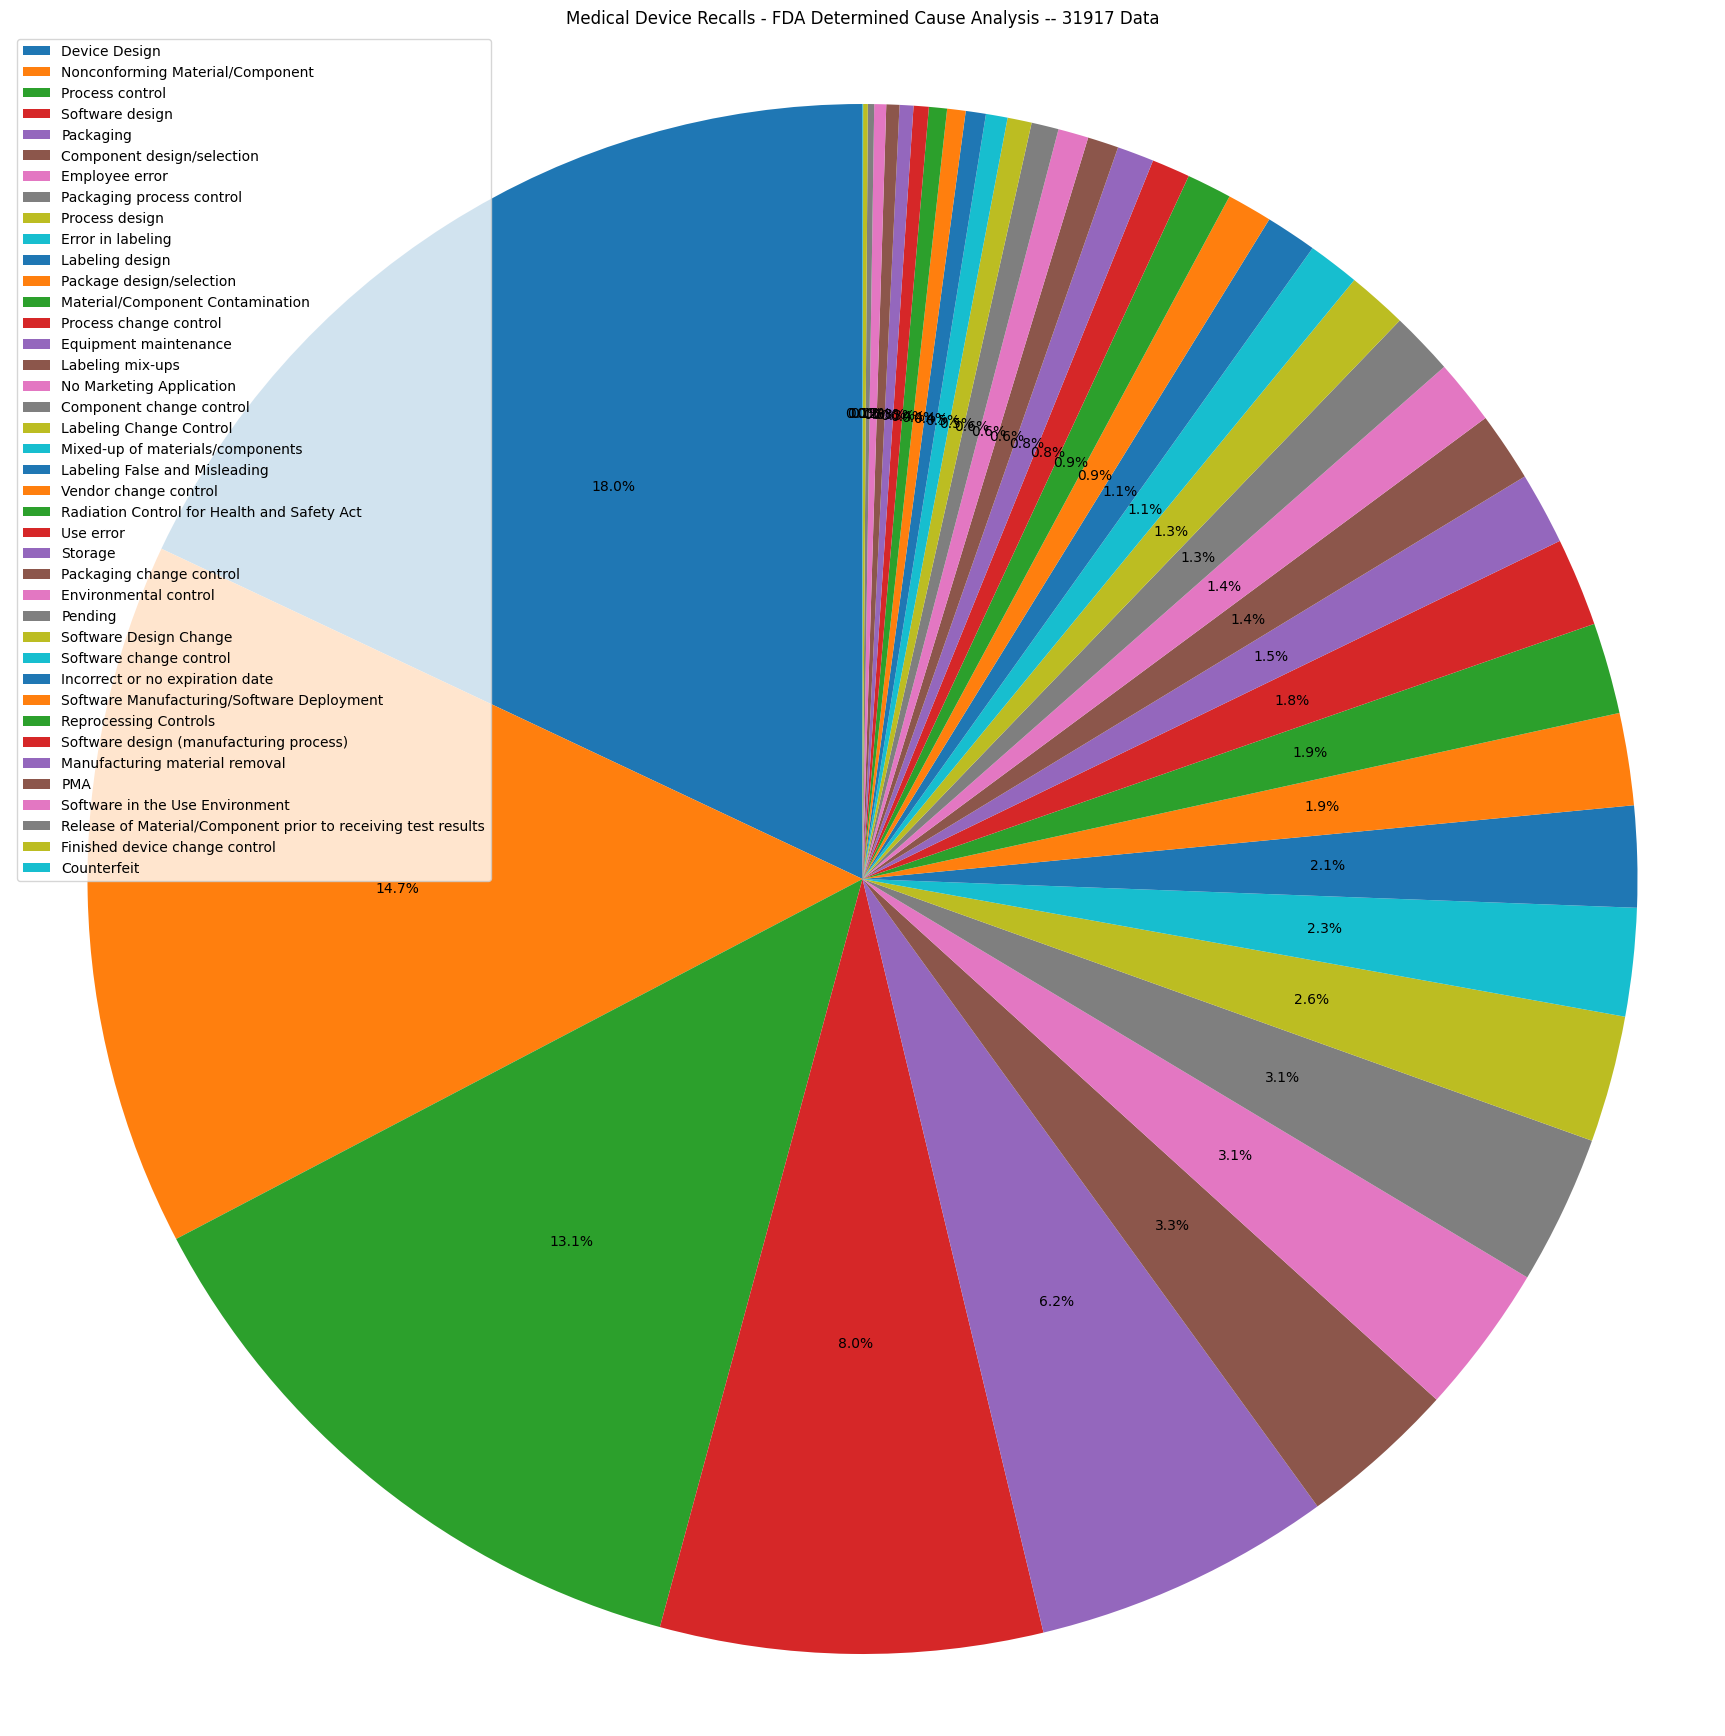

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

df_fda = pd.read_csv(f'fda recall 11-22-2023 with cause-{len(df_fda)}.csv') #these only contains 500 data, use more 

data = list(df_fda['FDA Determined Cause'])

# Filter out the data entries with 'Under Investigation by firm'
filtered_data = [item for item in data if item not in ['Under Investigation by firm', 
                                                       'Other',
                                                       'Unknown/Undetermined by firm',
                                                    'no fda determined cause in web'
                                                      ]]

# Count the occurrences of each unique value in the filtered data
counts = {}
for item in filtered_data:
    counts[item] = counts.get(item, 0) + 1

# Sort the counts from largest to smallest
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

# Prepare the data for the pie chart
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# Create the pie chart
fig, ax = plt.subplots(figsize=(22, 22))
ax.pie(values, labels=None, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to make the pie chart a circle
ax.axis('equal')

# Add a legend on the right side
ax.legend(labels, loc='upper left')

# Add a title
plt.title(f'Medical Device Recalls - FDA Determined Cause Analysis -- {len(filtered_data)} Data')

# Display the chart
plt.show()

# Analysis on device class for recalls 

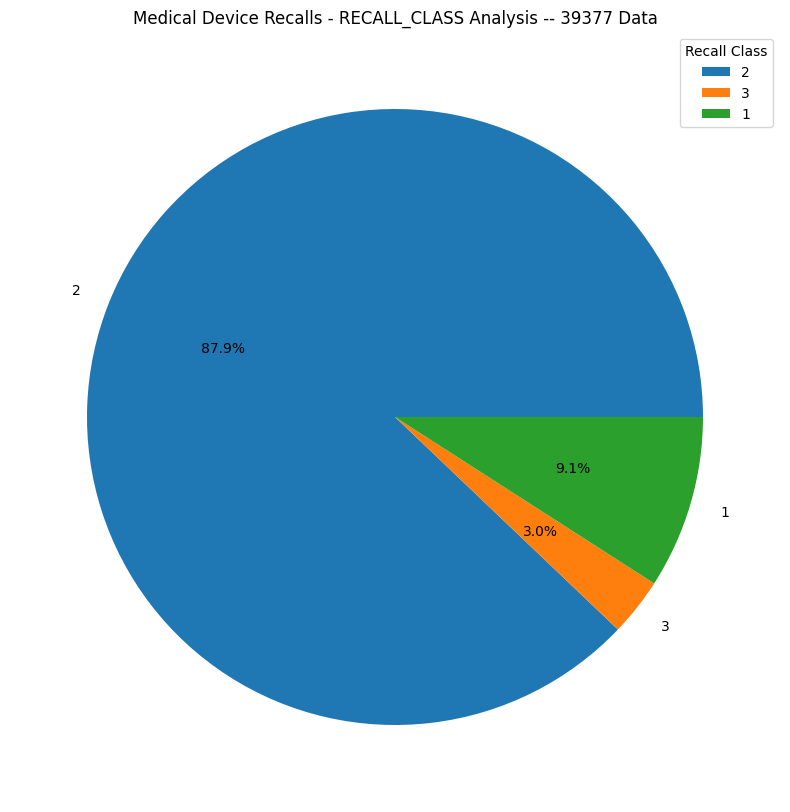

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

df_fda = pd.read_csv(f'fda recall 11-15-2023 with cause-{len(df_fda)}.csv') #these only contains 500 data, use more 

data = list(df_fda['RECALL_CLASS'])


# Count the unique numbers
counts = Counter(data)
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)


# Get the unique numbers and their counts
unique_numbers = list(counts.keys())
counts = list(counts.values())


# Set the figure size
plt.figure(figsize=(10, 10))
# Plot the pie chart
plt.pie(counts, labels=unique_numbers, autopct='%1.1f%%')

# Add legend
plt.legend(title='Recall Class',loc = 'upper right')

# Set title
plt.title(f'Medical Device Recalls - RECALL_CLASS Analysis -- {len(df_fda)} Data')

# Display the chart
plt.show()

In [14]:
labels

['Device Design',
 'Nonconforming Material/Component',
 'Process control',
 'Software design',
 'Packaging',
 'Component design/selection',
 'Employee error',
 'Packaging process control',
 'Process design',
 'Error in labeling',
 'Labeling design',
 'Package design/selection',
 'Material/Component Contamination',
 'Process change control',
 'Equipment maintenance',
 'Labeling mix-ups',
 'No Marketing Application',
 'Component change control',
 'Labeling Change Control',
 'Mixed-up of materials/components',
 'Labeling False and Misleading',
 'Vendor change control',
 'Radiation Control for Health and Safety Act',
 'Use error',
 'Storage',
 'Packaging change control',
 'Environmental control',
 'Pending',
 'Software Design Change',
 'Software change control',
 'Incorrect or no expiration date',
 'Software Manufacturing/Software Deployment',
 'Reprocessing Controls',
 'Software design (manufacturing process)',
 'Manufacturing material removal',
 'PMA',
 'Software in the Use Environment',

# Plot the recall events with year

In [49]:
df_fda = pd.read_csv(f'fda recall 11-15-2023 with cause-{len(df_fda)}.csv')
sorted_df = df_fda.sort_values('CENTER_CLASSIFICATION_DT')

In [50]:
sorted_df['Year'] = pd.to_datetime(sorted_df['CENTER_CLASSIFICATION_DT']).dt.year

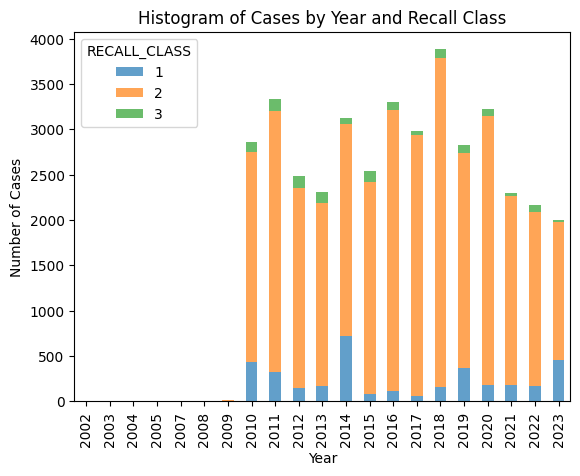

In [51]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and 'RECALL_CLASS' and count the occurrences
grouped_df = sorted_df.groupby(['Year', 'RECALL_CLASS']).size().unstack()

# Plotting the histogram
grouped_df.plot(kind='bar', stacked=True, alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Histogram of Cases by Year and Recall Class')

# Show the plot
plt.show()

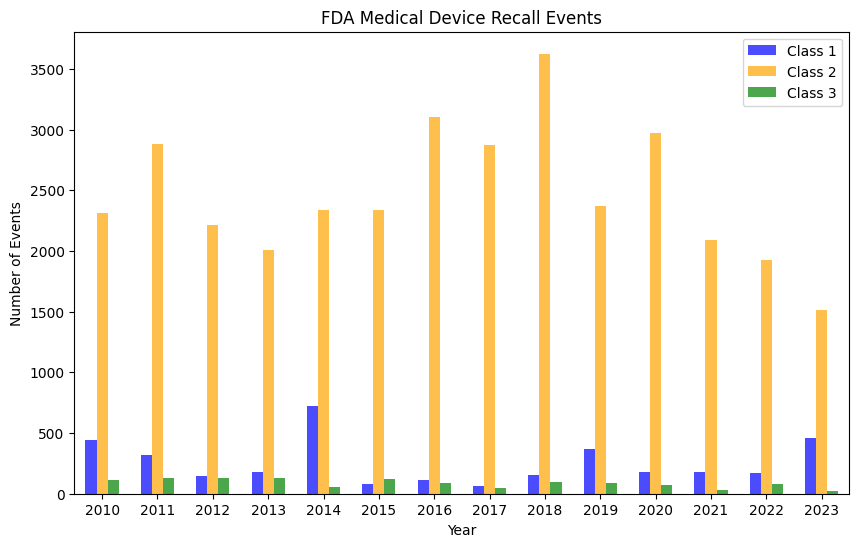

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataframe
df = pd.read_csv(f'fda recall 11-15-2023 with cause-{len(df_fda)}.csv')


# Convert 'CENTER_CLASSIFICATION_DT' column to datetime
df['CENTER_CLASSIFICATION_DT'] = pd.to_datetime(df['CENTER_CLASSIFICATION_DT'])

# Extract the year from 'CENTER_CLASSIFICATION_DT'
df['Year'] = df['CENTER_CLASSIFICATION_DT'].dt.year

# Group the data by 'Year' and 'RECALL_CLASS' and count the occurrences
grouped_df = df.groupby(['Year', 'RECALL_CLASS']).size().unstack()

# Create a side-by-side bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
years = np.arange(df['Year'].min(), df['Year'].max() + 1)
bar_positions = [years - bar_width, years, years + bar_width]

# Set the colors for each class
colors = ['blue', 'orange', 'green']

# Iterate over each class and plot the bars side by side
for i, recall_class in enumerate(grouped_df.columns):
    data = grouped_df[recall_class].reindex(years, fill_value=0)
    ax.bar(bar_positions[i], data.values, width=bar_width, color=colors[i], alpha=0.7)

# Set the x-axis tick labels to the years
ax.set_xticks(years)
ax.set_xticklabels(years)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Events')

# Set the title
ax.set_title('FDA Medical Device Recall Events')

# Create a legend for the classes
class_labels = ['Class 1', 'Class 2', 'Class 3']
ax.legend(class_labels, loc='upper right')
# Set the x-axis limits
ax.set_xlim(2009.5, 2023.5)
# Show the plot
plt.show()